In [2]:
import matplotlib.pyplot as plt
import cPickle as pickle
import tensorflow as tf
from core.solver import CaptioningSolver
from core.model import CaptionGenerator
from core.utils import load_coco_data
from core.bleu import evaluate

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data = load_coco_data(data_path='./data', split='val')
with open('./data/train/word_to_idx.pkl', 'rb') as f:
    word_to_idx = pickle.load(f)

image_idxs <type 'numpy.ndarray'> (130000,) int32
file_names <type 'numpy.ndarray'> (26000,) <U126
features <type 'numpy.ndarray'> (26000, 196, 512) float32
captions <type 'numpy.ndarray'> (130000, 17) int32
Elapse time: 7.79


In [4]:
model = CaptionGenerator(word_to_idx, dim_feature=[196, 512], dim_embed=512,
                                   dim_hidden=1024, n_time_step=16, prev2out=True,
                                             ctx2out=True, alpha_c=1.0, selector=True, dropout=True)

In [ ]:
solver = CaptioningSolver(model, data, data, n_epochs=15, batch_size=128, update_rule='adam',
                                      learning_rate=0.001, print_every=500, save_every=1, image_path='/mnt/ai_challenger_caption_validation_20170910/caption_validation_images_20170910',
                                pretrained_model=None, model_path='./model/lstm', test_model='./model/lstm/model-6',
                                 print_bleu=False, log_path='./log/')

Sampled Caption: 一个 穿着 黑色 衣服 的 男人 和 一个 穿着 裙子 的 女人 坐在 舞台 上 .


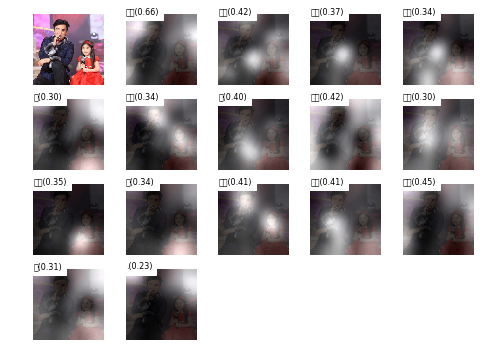

Sampled Caption: 一个 人 的 前面 有 两个 穿着 西装 的 男人 在 室内 的 桌子 旁 .


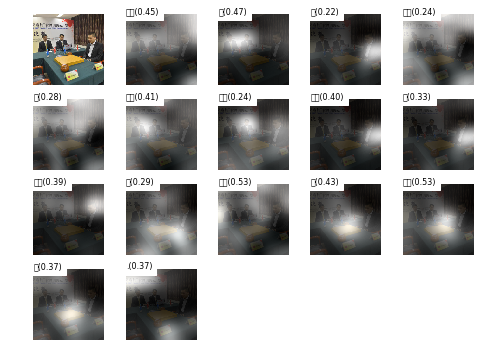

Sampled Caption: 一个 双手 拿 着 剪刀 的 女人 站 在 玉米地 里 .


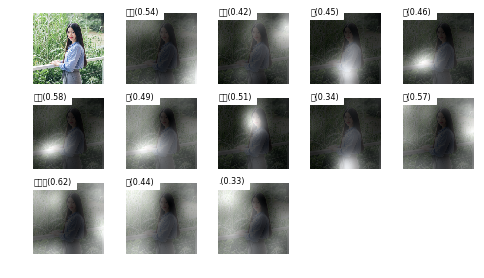

Sampled Caption: 一个 双手 拿 着 书 的 女人 坐在 图书馆 里 的 书架 旁 看书 .


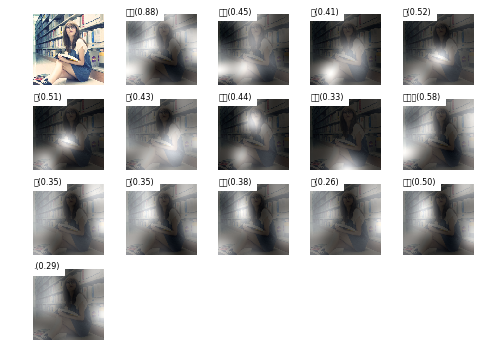

Sampled Caption: 一个 戴着 眼镜 的 男人 和 一个 穿着 黑色 上衣 的 女人 站 在 道路 .


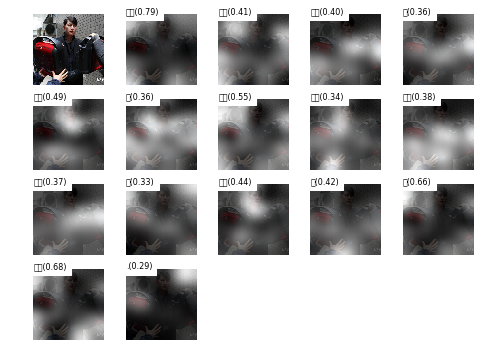

Sampled Caption: 一个 穿着 裙子 的 女人 和 一个 穿着 西装 的 男人 站 在 舞台 上 .


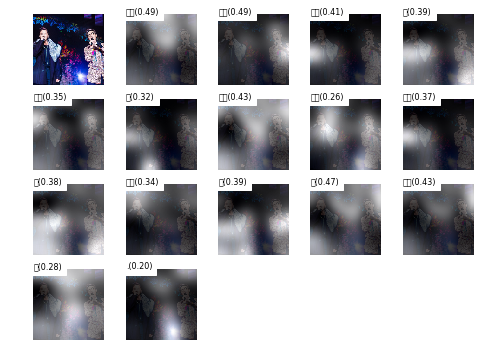

Sampled Caption: 一个 人 的 前面 有 一个 戴着 墨镜 的 男人 走 在 大厅 里 .


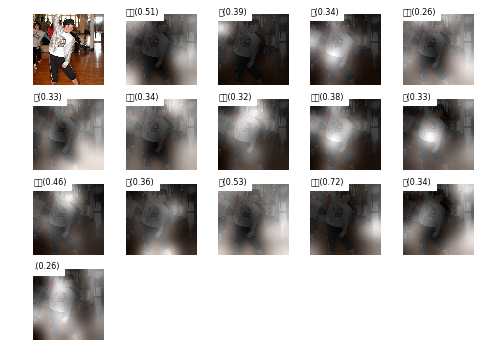

Sampled Caption: 一个 穿着 裙子 的 女人 抱 着 一个 穿着 白色 衣服 的 小孩 站 在 .


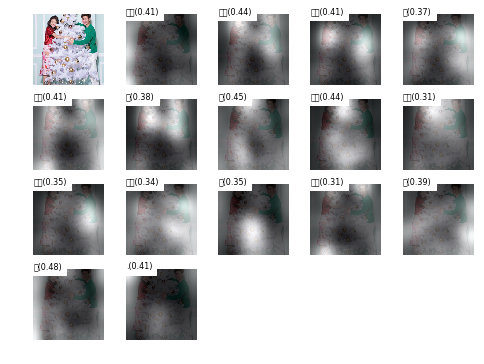

Sampled Caption: 健身房 里 有 一个 穿着 背心 的 男人 在 指导 一个 穿着 背心 的 女人 .


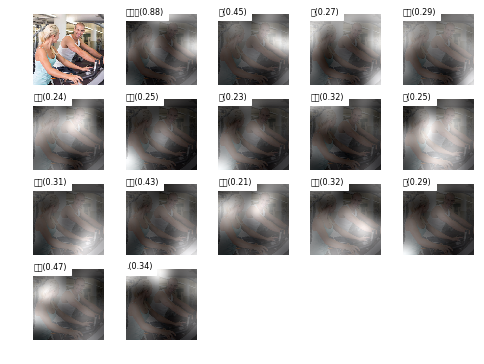

Sampled Caption: 房间 里 一个 穿着 黑色 上衣 的 男人 在 给 一个 躺 在 床上 的 .


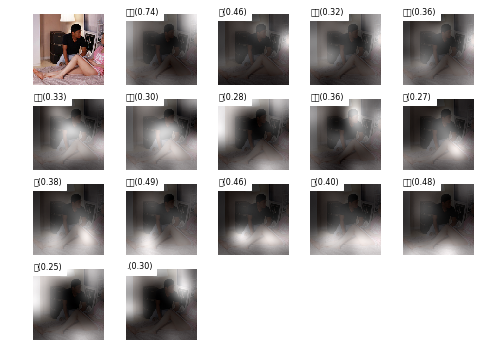

In [ ]:
solver.test(data, split='val')